In [313]:
# Imports all in one place
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [28]:
# from kaggle.api.kaggle_api_extended import KaggleApi

# api = KaggleApi({"username":"dlromanoff","key":"3faca6957e86cee14fb3efd7b8168fa8"})
# api.athenticate()

%env KAGGLE_CONFIG_DIR=/Users/danielleromanoff/

# You also have to join the Titanic competition to have access to the data
!kaggle competitions download -c titanic

env: KAGGLE_CONFIG_DIR=/Users/danielleromanoff/
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [29]:
!wget https://os.unil.cloud.switch.ch/fma/fma_metadata.zip
!unzip fma_metadata.zip

--2019-01-21 15:51:59--  https://os.unil.cloud.switch.ch/fma/fma_metadata.zip
Resolving os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)... 2001:620:5ca1:2ff::ce53, 86.119.28.13
Connecting to os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)|2001:620:5ca1:2ff::ce53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358412441 (342M) [application/zip]
Saving to: ‘fma_metadata.zip.2’

fma_metadata.zip.2  100%[===================>] 341.81M  14.3MB/s    in 25s     

2019-01-21 15:52:25 (13.9 MB/s) - ‘fma_metadata.zip.2’ saved [358412441/358412441]

Archive:  fma_metadata.zip
   skipping: fma_metadata/README.txt  need PK compat. v4.6 (can do v4.5)
   skipping: fma_metadata/checksums  need PK compat. v4.6 (can do v4.5)
   skipping: fma_metadata/not_found.pickle  need PK compat. v4.6 (can do v4.5)
   skipping: fma_metadata/raw_genres.csv  need PK compat. v4.6 (can do v4.5)
   skipping: fma_metadata/raw_albums.csv  need PK compat. v4.6 (can do v4.5)
   skipping: fma_meta

In [8]:
train_df = pd.read_csv('train.csv').dropna()
test_df = pd.read_csv('test.csv').dropna()  # Unlabeled, for Kaggle submission

X = train_df[['Pclass', 'Age', 'Fare']]
y = train_df.Survived

linear_reg = LinearRegression().fit(X, y)
linear_reg.score(X, y)

0.08389810726550917

In [9]:
linear_reg.predict(test_df[['Pclass', 'Age', 'Fare']])

array([0.79543117, 0.58610823, 0.67595121, 0.793829  , 0.62090522,
       0.72542107, 0.59848968, 0.58734245, 0.48567063, 0.77627736,
       0.84211887, 0.57052439, 0.7754689 , 0.96621114, 0.70287941,
       0.57673837, 0.72321391, 0.75894755, 0.77968041, 0.50246003,
       0.49858077, 0.7474959 , 0.3542282 , 0.61648435, 0.71300224,
       0.66294608, 0.53175333, 0.77397395, 0.68419387, 0.68395536,
       0.52041202, 0.56814038, 0.79586606, 0.81372012, 0.61068545,
       0.57260627, 0.52525981, 0.58055388, 0.45584728, 0.67976208,
       0.8226707 , 0.84286197, 0.96189157, 0.66724612, 0.68589478,
       0.61846513, 0.63455044, 0.68275686, 0.65738372, 0.45198998,
       0.59988596, 0.63845908, 0.63132487, 0.7888473 , 0.60126246,
       0.79714045, 0.78713803, 0.54643775, 0.42823635, 0.7711724 ,
       0.53552976, 0.55608044, 0.54480459, 0.57031915, 0.65080369,
       0.77958926, 0.6371013 , 0.70993488, 0.71493598, 0.60375943,
       0.54407206, 0.48186138, 0.76576089, 0.75456305, 0.53968

In [10]:
linear_reg.coef_

array([-0.08596295, -0.00829314,  0.00048775])

In [11]:
test_case = np.array([[1, 5, 500]])  # Rich 5-year old in first class
linear_reg.predict(test_case)

array([1.14845883])

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(X, y)
log_reg.score(X, y)

/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7103825136612022

In [13]:
log_reg.predict(test_df[['Pclass', 'Age', 'Fare']])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
log_reg.predict(test_case)[0]
# help(log_reg.predict)

1

In [15]:
log_reg.predict_proba(test_case)[0]

array([0.02485552, 0.97514448])

In [16]:
# What's the math?
log_reg.coef_

array([[-0.0455017 , -0.02912513,  0.0048037 ]])

In [17]:
log_reg.intercept_

array([1.45878264])

In [18]:
# The logistic sigmoid "squishing" function, implemented to accept numpy arrays
def sigmoid(x):
  return 1 / (1 + np.e**(-x))

In [19]:
sigmoid(log_reg.intercept_ + np.dot(log_reg.coef_, np.transpose(test_case)))

array([[0.97514448]])

In [220]:
tracks = pd.read_csv('tracks.csv', header=1)
tracks.drop(index=0, inplace=True)
tracks.rename(index=str, columns={'Unnamed: 0': 'track_id'}, inplace=True)
# tracks.head()

In [221]:
# Put the genre_top column at the beginning
tracks = tracks.reindex(columns = (['genre_top'] + list([a for a in tracks.columns if a != 'genre_top'])))

# Remove any columns that don't have an entry for genre_top
tracks = tracks.dropna(subset =[ 'genre_top'])
tracks.shape
# tracks.head()

(49598, 53)

In [222]:
# delete columns where NaN's more than 2/3 of the data
def delete_nan_columns(df):
  l = df.shape[0]*.6
  for column in df.columns:
    if df[column].isnull().sum() > l:
      df.drop(column, axis=1, inplace=True)
  return df    

delete_nan_columns(tracks)

,genre_top,track_id,comments,date_created,date_released,favorites,id,information,listens,tags,...,duration,favorites.2,genres,genres_all,interest,license,listens.1,number,tags.2,title.1
1,Hip-Hop,2,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,4.0,1.0,<p></p>,6073.0,[],...,168.0,2.0,[21],[21],4656.0,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293.0,3.0,[],Food
2,Hip-Hop,3,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,4.0,1.0,<p></p>,6073.0,[],...,237.0,1.0,[21],[21],1470.0,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514.0,4.0,[],Electric Ave
3,Hip-Hop,5,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,4.0,1.0,<p></p>,6073.0,[],...,206.0,6.0,[21],[21],1933.0,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151.0,6.0,[],This World
4,Pop,10,0.0,2008-11-26 01:45:08,2008-02-06 00:00:00,4.0,6.0,NaN,47632.0,[],...,161.0,178.0,[10],[10],54881.0,Attribution-NonCommercial-NoDerivatives (aka M...,50135.0,1.0,[],Freeway
10,Hip-Hop,134,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,4.0,1.0,<p></p>,6073.0,[],...,207.0,3.0,[21],[21],1126.0,Attribution-NonCommercial-ShareAlike 3.0 Inter...,943.0,5.0,[],Street Music
11,Rock,135,1.0,2008-11-26 01:49:19,2009-01-07 00:00:00,0.0,58.0,<p>A couple of unreleased mp3s from the fellas...,3331.0,[],...,837.0,0.0,"[45, 58]","[58, 12, 45]",2484.0,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832.0,0.0,[],Father's Day
12,Rock,136,1.0,2008-11-26 01:49:19,2009-01-07 00:00:00,0.0,58.0,<p>A couple of unreleased mp3s from the fellas...,3331.0,[],...,509.0,0.0,"[45, 58]","[58, 12, 45]",1948.0,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498.0,0.0,[],Peel Back The Mountain Sky
13,Experimental,137,1.0,2008-11-26 01:49:35,2006-12-01 00:00:00,2.0,59.0,<p>Here's the proof in the pudding that the as...,1681.0,['lafms'],...,1233.0,2.0,"[1, 32]","[32, 1, 38]",2559.0,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1278.0,1.0,['lafms'],Side A
14,Experimental,138,1.0,2008-11-26 01:49:35,2006-12-01 00:00:00,2.0,59.0,<p>Here's the proof in the pudding that the as...,1681.0,['lafms'],...,1231.0,2.0,"[1, 32]","[32, 1, 38]",1909.0,Attribution-NonCommercial-ShareAlike 3.0 Inter...,489.0,2.0,['lafms'],Side B
15,Folk,139,0.0,2008-11-26 01:49:57,2009-01-16 00:00:00,1.0,60.0,"<p>A full ensamble of strings, drums, electron...",1304.0,[],...,296.0,3.0,[17],[17],702.0,Attribution-Noncommercial-No Derivative Works ...,582.0,2.0,[],CandyAss


In [249]:
garbage_columns = ['track_id','id', 'information','comments.1','title','bio',
                   'members','website','split','subset',
                   'comments.2','genres','genres_all','license','title.1','date_created','date_released',
                   'date_created.1','date_created.2','longitude','latitude']

tracks2 = tracks.drop(columns = garbage_columns)
tracks2.shape

(49598, 19)

In [282]:
def encode_cat(df):
  for col_name in df.columns:
      if(df[col_name].dtype == 'object'):
          df[col_name]= df[col_name].astype('category')
          df[col_name] = df[col_name].cat.codes
  return df

encode_cat(tracks2)

,genre_top,comments,favorites,listens,tags,tracks,type,favorites.1,id.1,location,name,tags.1,bit_rate,duration,favorites.2,interest,listens.1,number,tags.2
1,7,0.0,4.0,6073.0,992,7.0,0,9.0,1.0,890,178,708,256000.0,168.0,2.0,4656.0,1293.0,3.0,1002
2,7,0.0,4.0,6073.0,992,7.0,0,9.0,1.0,890,178,708,256000.0,237.0,1.0,1470.0,514.0,4.0,1002
3,7,0.0,4.0,6073.0,992,7.0,0,9.0,1.0,890,178,708,256000.0,206.0,6.0,1933.0,1151.0,6.0,1002
4,12,0.0,4.0,47632.0,992,2.0,0,74.0,6.0,-1,4196,5977,192000.0,161.0,178.0,54881.0,50135.0,1.0,1002
10,7,0.0,4.0,6073.0,992,7.0,0,9.0,1.0,890,178,708,256000.0,207.0,3.0,1126.0,943.0,5.0,1002
11,13,1.0,0.0,3331.0,992,4.0,3,0.0,52.0,-1,196,130,256000.0,837.0,0.0,2484.0,1832.0,0.0,1002
12,13,1.0,0.0,3331.0,992,4.0,3,0.0,52.0,-1,196,130,256000.0,509.0,0.0,1948.0,1498.0,0.0,1002
13,5,1.0,2.0,1681.0,577,2.0,1,5.0,53.0,714,278,230,256000.0,1233.0,2.0,2559.0,1278.0,1.0,580
14,5,1.0,2.0,1681.0,577,2.0,1,5.0,53.0,714,278,230,256000.0,1231.0,2.0,1909.0,489.0,2.0,580
15,6,0.0,1.0,1304.0,992,2.0,0,11.0,54.0,1101,320,273,128000.0,296.0,3.0,702.0,582.0,2.0,1002


In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

X = tracks2[['favorites', 'listens', 'tags', 'tracks', 'duration', 'interest', 'name']]
y = tracks2['genre_top']

linear_reg = LinearRegression().fit(X, y)
linear_reg.score(X, y)

0.028846903525901576

In [295]:
print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(49598, 7) 

(34718, 7)
(14880, 7)
(34718,)
(14880,)


In [308]:
y = tracks2['genre_top']
X = tracks2[['favorites', 'listens', 'tags', 'tracks', 'duration', 'interest', 'name']]

In [310]:
y_pred = log_reg.predict(X_test)

In [311]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[   0,    0,    0,    0,    8,    0,    0,    0,    0,    0,    0,
           0,    0,   18,    0,    0],
       [   0,   36,    0,    0,  107,   70,    0,    1,    0,    0,    0,
           0,    2,   81,    0,    0],
       [   0,    0,    0,    0,   13,    2,    0,    0,    0,    0,    0,
           0,    0,   47,    0,    0],
       [   0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,
           0,    0,    7,    0,    0],
       [   0,   10,    0,    0,  415,  400,    0,    0,    0,    0,    0,
           0,    1, 1534,    0,    0],
       [   0,    0,    0,    0,   81, 1211,    0,    1,    0,    0,    0,
           0,    0, 1321,    0,    0],
       [   0,    0,    0,    0,   45,   87,    0,    0,    0,    0,    0,
           0,    0,  569,    0,    0],
       [   0,    5,    0,    0,   80,   87,    0,    0,    0,    0,    0,
           0,    0,  672,    0,    0],
       [   0,    1,    0,    0,  189,   73,    0,    0,    4,    0,    0,
           0,    1,  2

Text(0.5, 257.44, 'Predicted label')

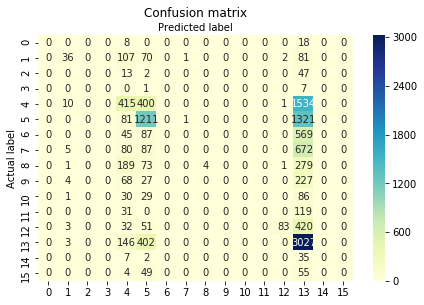

In [314]:
class_names = [0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [252]:
print(tracks2.columns)
tracks2.head()

Index(['genre_top', 'comments', 'favorites', 'listens', 'tags', 'tracks',
       'type', 'favorites.1', 'id.1', 'location', 'name', 'tags.1', 'bit_rate',
       'duration', 'favorites.2', 'interest', 'listens.1', 'number', 'tags.2'],
      dtype='object')


,genre_top,comments,favorites,listens,tags,tracks,type,favorites.1,id.1,location,name,tags.1,bit_rate,duration,favorites.2,interest,listens.1,number,tags.2
1,7,0.0,4.0,6073.0,992,7.0,0,9.0,1.0,890,178,708,256000.0,168.0,2.0,4656.0,1293.0,3.0,1002
2,7,0.0,4.0,6073.0,992,7.0,0,9.0,1.0,890,178,708,256000.0,237.0,1.0,1470.0,514.0,4.0,1002
3,7,0.0,4.0,6073.0,992,7.0,0,9.0,1.0,890,178,708,256000.0,206.0,6.0,1933.0,1151.0,6.0,1002
4,12,0.0,4.0,47632.0,992,2.0,0,74.0,6.0,-1,4196,5977,192000.0,161.0,178.0,54881.0,50135.0,1.0,1002
10,7,0.0,4.0,6073.0,992,7.0,0,9.0,1.0,890,178,708,256000.0,207.0,3.0,1126.0,943.0,5.0,1002


In [298]:
log_reg = LogisticRegression().fit(X, y)
log_reg.score(X, y)

/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.3877978950764144

In [299]:
log_reg.predict(X_test[['favorites', 'listens', 'tags', 'tracks', 'duration', 'interest', 'name']])

array([ 5, 13,  4, ..., 13, 13, 13], dtype=int8)

In [290]:
log_reg.predict_proba(test_case)[0]

array([1.81424275e-03, 4.55964991e-02, 2.52573821e-03, 1.50268228e-04,
       1.91109565e-01, 1.83969306e-01, 7.25873507e-02, 6.50340600e-02,
       5.84913125e-02, 3.70460057e-02, 2.32606746e-02, 6.24388297e-03,
       1.62290000e-02, 2.62209274e-01, 4.96094357e-03, 2.87718761e-02])

In [300]:
log_reg.coef_

array([[ 6.12497919e-02,  5.67298984e-07, -3.32546392e-03,
        -1.04909674e-01, -5.79566296e-03,  5.10282652e-07,
        -2.45485841e-04],
       [ 1.08967269e-01,  2.68578421e-06, -2.78991207e-03,
        -6.57498800e-03, -2.75884468e-04, -1.60833901e-06,
        -2.42088685e-04],
       [-5.24066145e-02,  4.32029109e-06, -1.94291777e-03,
        -1.37650830e-01, -6.88369229e-03, -1.42153847e-05,
        -2.08357329e-04],
       [-7.11943925e-02,  1.17333434e-05, -3.09832324e-03,
        -2.19289062e-01, -4.62213336e-03, -1.20292305e-04,
        -6.12812062e-05],
       [-2.28035525e-04, -4.54283429e-07, -1.28565889e-03,
        -5.38068792e-03, -4.00122038e-04,  6.28698820e-06,
        -1.37111703e-05],
       [ 6.03111277e-05, -3.10835822e-05, -1.43444915e-03,
         2.35053359e-02,  1.27576659e-03, -2.15036730e-04,
        -3.48212939e-05],
       [ 6.34692896e-03, -3.34068403e-06, -1.26041005e-03,
        -1.51508172e-02, -2.42170194e-03, -1.05677379e-04,
        -1.3619799

In [301]:
log_reg.intercept_

array([-4.38445994e-02, -3.70367913e-01, -7.24408719e-02, -1.42919724e+00,
       -1.27891099e-04, -1.93694493e-04, -2.74402575e-03, -3.81099721e-04,
       -3.95540874e-04, -1.15424307e-01, -3.26389067e-04, -1.63555462e-02,
       -9.15726964e-05, -2.85654808e-04, -6.01779598e-03, -1.18919061e-03])

In [302]:
# The logistic sigmoid "squishing" function, implemented to accept numpy arrays
def sigmoid(x):
  return 1 / (1 + np.e**(-x))
sigmoid(log_reg.intercept_ + np.dot(log_reg.coef_, np.transpose(test_case)))

array([[1.82130372e-03, 1.31460567e-03, 1.77004974e-03, 4.56378129e-04,
        1.90253631e-03, 1.90241136e-03, 1.89757496e-03, 1.90205555e-03,
        1.90202814e-03, 1.69570517e-03, 1.90215942e-03, 1.87196909e-03,
        1.90260528e-03, 1.90223676e-03, 1.89138462e-03, 1.90052206e-03],
       [6.10131724e-02, 4.47776511e-02, 5.93952958e-02, 1.59995728e-02,
        6.35663182e-02, 6.35624014e-02, 6.34107688e-02, 6.35512475e-02,
        6.35503881e-02, 5.70389087e-02, 6.35545035e-02, 6.26071707e-02,
        6.35684802e-02, 6.35569279e-02, 6.32166178e-02, 6.35031730e-02],
       [2.58046022e-03, 1.86295428e-03, 2.50789621e-03, 6.46974587e-04,
        2.69546078e-03, 2.69528390e-03, 2.68843724e-03, 2.69478020e-03,
        2.69474138e-03, 2.40263566e-03, 2.69492723e-03, 2.65218784e-03,
        2.69555842e-03, 2.69503672e-03, 2.67967386e-03, 2.69260931e-03],
       [8.56747186e-04, 6.18228579e-04, 8.32614506e-04, 2.14526399e-04,
        8.94997836e-04, 8.94938997e-04, 8.92661549e-04, 8.947

What are the best predictors of genre?
What information isn't very useful for predicting genre?
What surprised you the most about your results?